# ARIMA Model for Stock Price Prediction

This script creates an ARIMA model to predict historical closing prices of the companies, and then uses an auto_arima model to automatically select hyperparameters and predict closing prices for the next 6 months.

# Gather DataFrames from CSVs

In [2]:
import pandas as pd

data_dir = '../DATA'
google = pd.read_csv(data_dir + '/Alphabet_Google.csv')
apple = pd.read_csv(data_dir + '/Apple.csv')
meta = pd.read_csv(data_dir + '/Meta Platforms.csv')
microsoft = pd.read_csv(data_dir + '/Microsoft.csv')
nvidia = pd.read_csv(data_dir + '/NVIDIA.csv')

# Preprocess the Data

In [3]:
def preprocess_data(company):
    company = company.reset_index()
    company['Date'] = pd.to_datetime(company['Date'])
    company.set_index('Date', inplace=True)
    company = company['Close'].to_frame()

    return company

In [4]:
companies = {}
companies['Google'] = {'data': preprocess_data(google)}
companies['Apple'] = {'data': preprocess_data(apple)}
companies['Meta'] = {'data': preprocess_data(meta)}
companies['Microsoft'] = {'data': preprocess_data(microsoft)}
companies['NVIDIA'] = {'data': preprocess_data(nvidia)}

# Build the ARIMA Models for each Company

In [5]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

def arima_forecast(history):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit() 
    output = model_fit.forecast()
    yhat = output[0]
    return yhat #return predictions

def plot_predictions(name, dates, size, test, predictions):
    plt.plot(dates, test, label='Real')
    plt.plot(dates, predictions, color='red', label='Predicted')
    plt.title(name + ' ARIMA Predictions vs Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

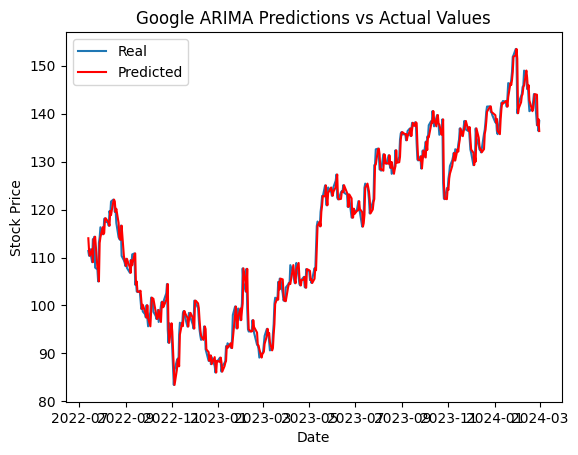

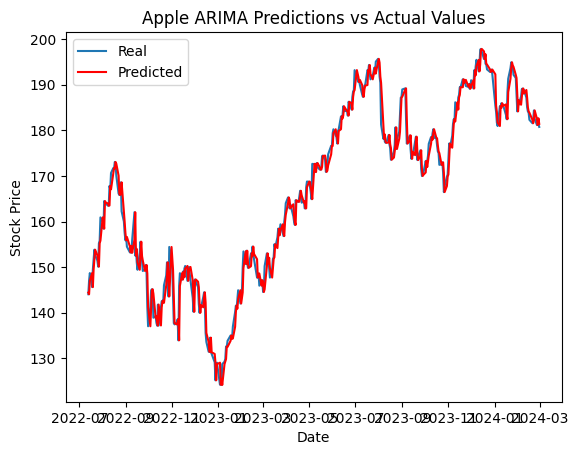

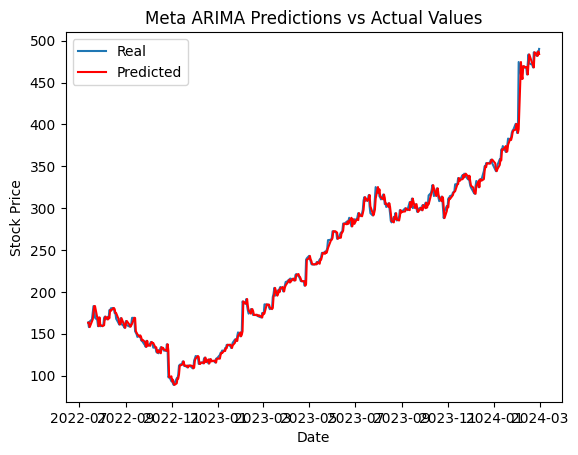

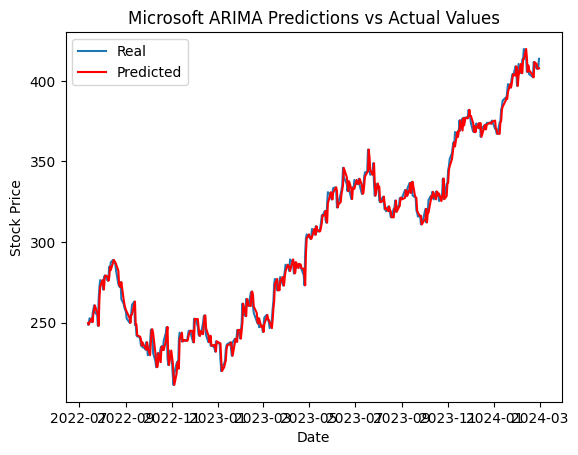

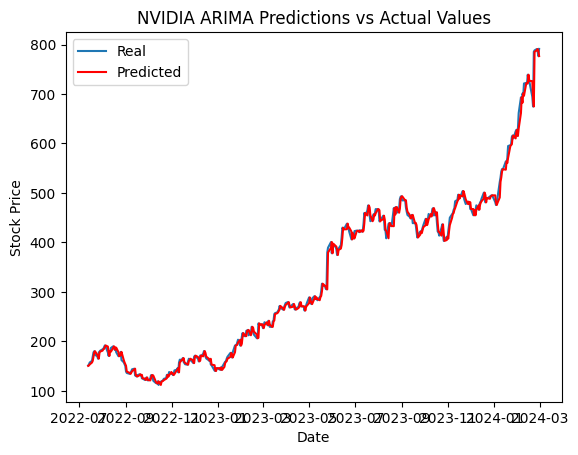

In [6]:
companies_history = {}

#create train and test set
for name, company in companies.items():
    X = company['data'].values
    #sklearn does have a train_test_split function, but we want to do it sequentially to save indices for graphing
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:len(X)]    

    history = [x for x in train]
    predictions = list()

    for i in range(len(test)):
        yhat = arima_forecast(history)
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)

    companies_history[name] = {'history': history}
    plot_predictions(name, company['data'].iloc[train_size:,:].index, train_size, test, predictions)

# Looks pretty accurate with historical data, let's see how it performs with future predictions

In [8]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:0000:0100:01


In [9]:
from pmdarima.arima import auto_arima

def future_forecast(history, months):
    model = auto_arima(history)
    #model_fit = model.fit() 
    #output = model_fit.forecast(steps = months)
    output = model.predict(n_periods = months)
    return output #return predictions

def plot_future_forecast(name, months, predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(months, predictions, color='red', label='Future Predictions')
    plt.title(name + ' Future Stock Price Predictions using ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Identify the best hyperparameters using Auto ARIMA

In [18]:

# Assuming 'dates' is a pandas DateTimeIndex or similar
# and you have datetime objects to work with
def extend_dates(dates, periods):
    last_date = dates[-1]
    future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')
    return future_dates

# Adjust your plotting function to handle future dates correctly
def plot_predictions(name, dates, size, test, predictions, future_predictions):
    plt.figure(figsize=(14, 7))

    # Historical data plotting
    plt.plot(dates[:size], test[:size], label='Historical')

    # Adjusted for future predictions plotting
    # Generate or ensure future dates are correctly aligned with future predictions
    future_dates = extend_dates(dates[:size], len(future_predictions))
    
    # Ensure this check or generate a correct future_dates list as needed
    if len(future_predictions) > 0:
        plt.scatter(future_dates, future_predictions, color='green', label='Future', marker='o')
    
    plt.title(f'{name} ARIMA Predictions vs Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Google :  [139.80834953 139.88837375 139.96372564 140.0351238  140.1031763
 140.16839771 140.23122342 140.29202191 140.35110494 140.40873635
 140.4651394  140.52050301 140.57498703 140.62872676 140.68183665
 140.73441358 140.78653951 140.83828381 140.88970517 140.94085326
 140.9917701  141.04249127 141.09304685 141.14346232 141.19375922
 141.24395578 141.29406745 141.34410727 141.39408629 141.44401388
 141.49389793 141.54374514 141.59356118 141.64335084 141.69311818
 141.74286664 141.79259911 141.84231806 141.89202556 141.94172338
 141.991413   142.04109569 142.09077251 142.14044436 142.19011201
 142.23977611 142.2894372  142.33909574 142.38875213 142.43840669
 142.48805971 142.53771143 142.58736204 142.63701171 142.6866606
 142.73630881]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_16828/2683718549.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


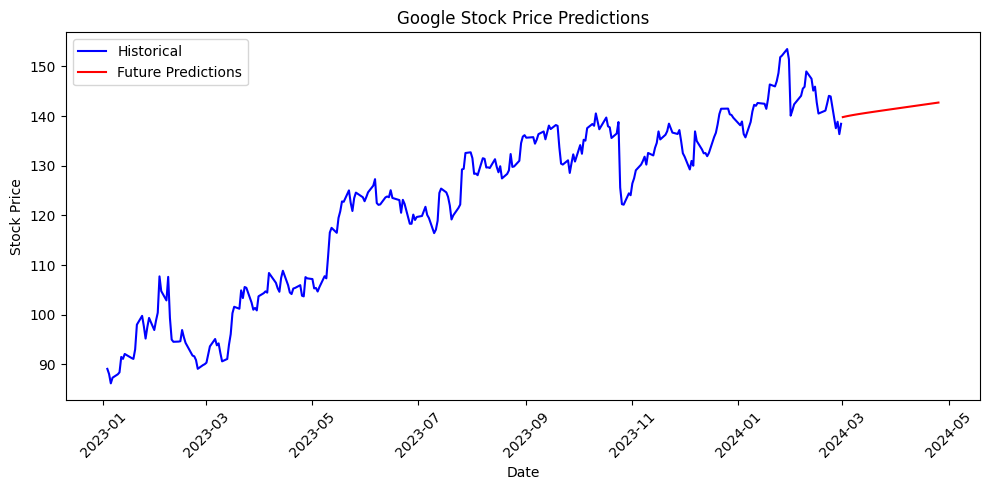

Apple :  [181.31692009 181.33629619 181.51582061 181.50125343 181.6913552
 181.69022499 181.84503006 181.89641823 181.98800493 182.10570967
 182.13565453 182.30328861 182.30052071 182.48028133 182.48687018
 182.6374091  182.689201   182.78419751 182.89516913 182.93430666
 183.09141631 183.09925022 183.26956392 183.28337708 183.42969761
 183.48228694 183.57991473 183.68521671 183.73232897 183.88014141
 183.89748327 184.05918692 184.07973528 184.22193061 184.27562109
 184.37522462 184.47577952 184.5297906  184.66940643 184.6952593
 184.84913305 184.87593841 185.0141368  185.06915633 185.17018681
 185.26679266 185.32675408 185.45915843 185.49261575 185.63938432
 185.6719834  185.8063394  185.86285244 185.96485339 186.05819849
 186.12327577]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_16828/2683718549.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


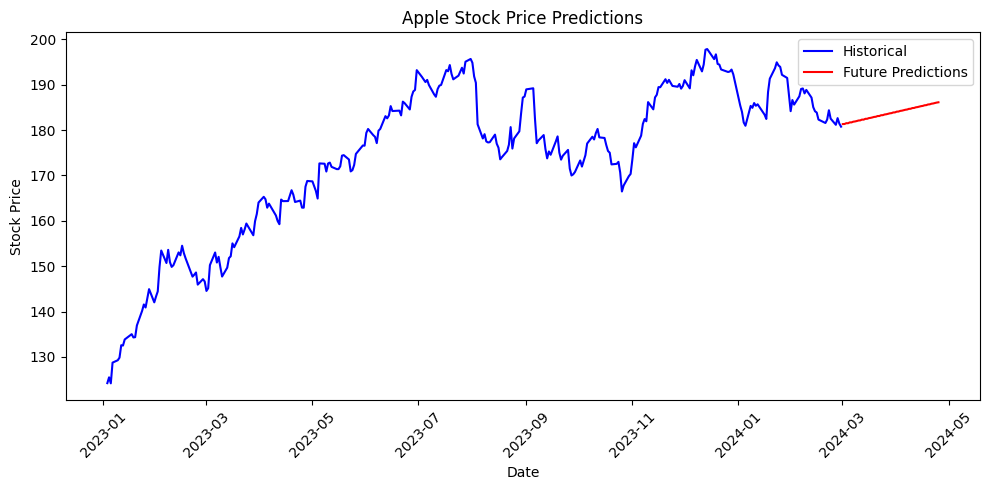

Meta :  [490.64071059 490.82000577 491.00309387 491.18846573 491.37521267
 491.56278758 491.75086101 491.93923461 492.12778895 492.31645211
 492.50518079 492.69394893 492.88274083 493.07154702 493.26036183
 493.44918183 493.63800494 493.82682994 494.01565607 494.20448288
 494.3933101  494.58213757 494.77096519 494.9597929  495.14862066
 495.33744845 495.52627626 495.71510409 495.90393192 496.09275975
 496.28158759 496.47041543 496.65924327 496.84807111 497.03689895
 497.2257268  497.41455464 497.60338248 497.79221032 497.98103816
 498.16986601 498.35869385 498.54752169 498.73634953 498.92517738
 499.11400522 499.30283306 499.4916609  499.68048874 499.86931659
 500.05814443 500.24697227 500.43580011 500.62462796 500.8134558
 501.00228364]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_16828/2683718549.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


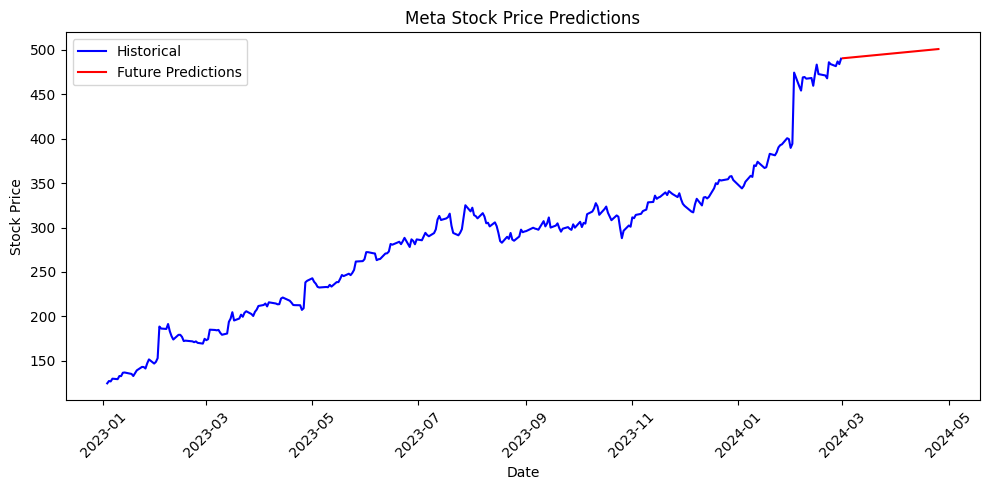

Microsoft :  [414.01980888 414.19720109 414.374676   414.55217527 414.72968172
 414.90719028 415.08469946 415.26220883 415.43971825 415.61722769
 415.79473713 415.97224658 416.14975602 416.32726547 416.50477491
 416.68228436 416.8597938  417.03730325 417.21481269 417.39232214
 417.56983158 417.74734103 417.92485047 418.10235991 418.27986936
 418.4573788  418.63488825 418.81239769 418.98990714 419.16741658
 419.34492603 419.52243547 419.69994492 419.87745436 420.05496381
 420.23247325 420.4099827  420.58749214 420.76500159 420.94251103
 421.12002047 421.29752992 421.47503936 421.65254881 421.83005825
 422.0075677  422.18507714 422.36258659 422.54009603 422.71760548
 422.89511492 423.07262437 423.25013381 423.42764326 423.6051527
 423.78266214]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_16828/2683718549.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


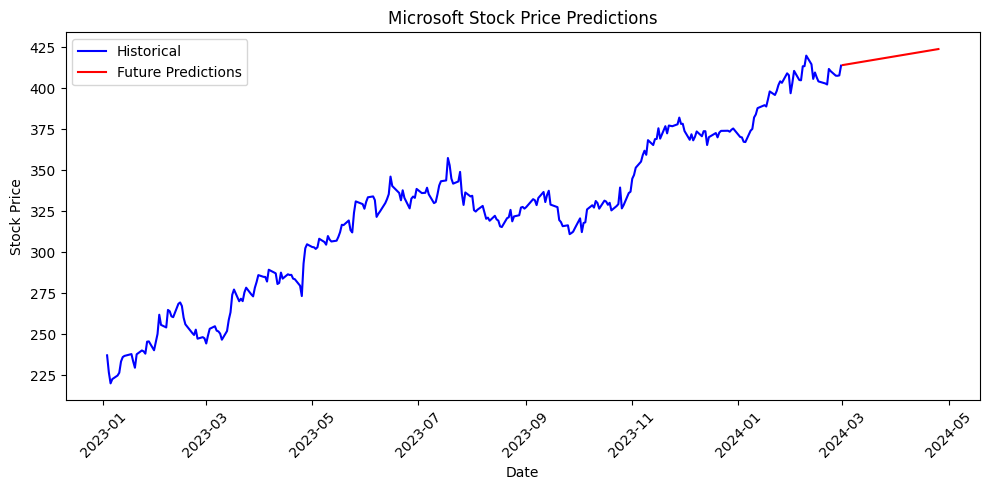

NVIDIA :  [ 821.84343524  825.77637575  829.78048952  833.9049673   837.70785835
  841.69405067  845.65595869  849.61979265  853.60764366  857.55537924
  861.5214111   865.48582236  869.44952738  873.41717691  877.38004925
  881.34467564  885.30925539  889.27362187  893.23856972  897.20297069
  901.16753071  905.13210252  909.09663207  913.06124132  917.02579024
  920.99035238  924.95491803  928.91947658  932.88404547  936.84860796
  940.81317137  944.77773546  948.74229846  952.70686275  956.67142638
  960.63599005  964.60055384  968.56511747  972.52968125  976.49424497
  980.45880869  984.42337242  988.38793613  992.35249986  996.31706359
 1000.28162731 1004.24619103 1008.21075476 1012.17531848 1016.13988221
 1020.10444593 1024.06900965 1028.03357338 1031.9981371  1035.96270083
 1039.92726455]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_16828/2683718549.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


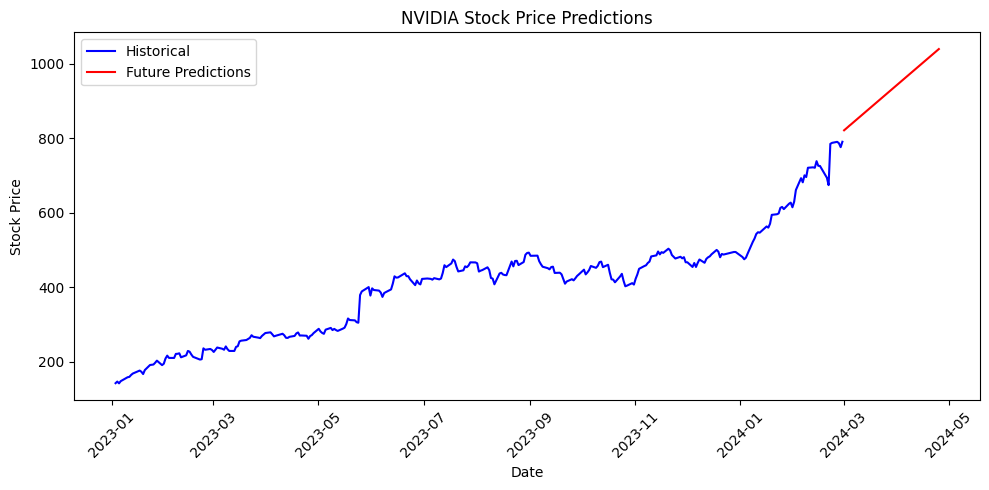

In [48]:
for name, company in companies.items():
    X = company['data'].values
    history = companies_history[name]['history']
    future_predictions = future_forecast(history, 56)
    print(name, ": ", future_predictions)
    
    # Convert index to DatetimeIndex to access .year attribute
    datetime_index = pd.to_datetime(company['data'].index, utc=True)
    
    # Extend the date range for future predictions
    dates = extend_dates(datetime_index, 56)
    
    # Filter historical values and dates from 2022 onwards
    historical_filter = datetime_index.year >= 2023
    historical_values = X[historical_filter]
    historical_dates = datetime_index[historical_filter]
    
    # Plot historical values from 2022 onwards
    plt.figure(figsize=(10, 5))
    plt.plot(historical_dates, historical_values, label='Historical', color='blue')
    
    # Ensure future dates are properly aligned with future_predictions for plotting
    if len(future_predictions) == len(dates):
        plt.plot(dates, future_predictions, label='Future Predictions', color='red')
    else:
        print("Error: Mismatch in length of future predictions and dates.")
    
    plt.title(f'{name} Stock Price Predictions')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Calculating greatest increase from 04/01/2024 - 06/01/2024

In [12]:
#calculate the increase in stock price from last month to last future predicted month
for name, company in companies_history.items():
    increase = (company['history'][-1] - company['history'][-3]) / company['history'][-3] * 100
    print(name + ' stock price is predicted to increase by ' + str(round(increase[0], 2)) + '% from last month to the last future predicted month')

Google stock price is predicted to increase by 0.25% from last month to the last future predicted month
Apple stock price is predicted to increase by 0.09% from last month to the last future predicted month
Meta stock price is predicted to increase by 0.01% from last month to the last future predicted month
Microsoft stock price is predicted to increase by 0.03% from last month to the last future predicted month
NVIDIA stock price is predicted to increase by 1.29% from last month to the last future predicted month
